In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import nltk
import spacy
import re

import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
x = pd.read_csv('after_eda_audible.csv')
x.head()

,name,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
0,Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
1,The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
2,The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
3,Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
4,"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [3]:
df = x.set_index('name')
df.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [4]:
#stars classification

def classify_stars(stars):
    if stars >= 5:
        return 1
    else:
        return 0

In [5]:
df['stars_class'] = df['stars'].apply(classify_stars)

In [6]:
df

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0,1
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Why We Fly,56,5.0,100.0,1.0,2014,6,1,0,0,0,1
River Town,876,5.0,836.0,1.0,2010,5,0,1,0,0,1
Figures in a Landscape,1004,4.0,949.0,1.0,2018,6,0,1,0,0,0


In [7]:
columns_to_drop = ['stars', 'ratings']
df_features = df.drop(columns_to_drop, axis=1)
df_features.head()

,time,price,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,
Geronimo Stilton #11 & #12,140,468.0,2008,8,0,1,0,0,1
The Burning Maze,788,820.0,2018,5,0,1,0,0,0
The Deep End,123,410.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,615.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,820.0,2010,1,0,1,0,0,0


In [8]:
df_features.stars_class.value_counts()

0    8311
1    6761
Name: stars_class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for classification, no need to scale
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns='stars_class'), df_features.stars_class, test_size=0.3, random_state=42)

#next step, use randomforest, cutboost (install), decision tree
#when debugging, use smaller data, if it makes sense, then use 

In [10]:
X_train.shape

(10550, 8)

In [11]:
X_test.shape

(4522, 8)

In [12]:
#import cross validation score
from sklearn.model_selection import cross_val_score

#import Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

#create classifier object
nb = GaussianNB()

#run cv for NB classifier
from sklearn.metrics import classification_report

nb_accuracy = cross_val_score(nb,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
nb_f1 = cross_val_score(nb,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('nb_accuracy: ' +str(nb_accuracy))
print('nb F1_Macro Score: '+str(nb_f1))
print('nb_accuracy_avg: ' + str(nb_accuracy.mean()) +'  |  lr_f1_avg: '+str(nb_f1.mean()))


#With these F1 scores, we can begin evaluating our model. While the accuracy is lower than if we only predicted 0 every time,
# our f1 score suggests we are doing a far better job of predicting stroke outcomes. 

nb_accuracy: [0.52630082 0.54051749 0.5423777 ]
nb F1_Macro Score: [0.24410163 0.14042553 0.11544805]
nb_accuracy_avg: 0.536398670998193  |  lr_f1_avg: 0.1666584045623176


In [13]:
#Let's now experiment with a few different basic models 

## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)

dt_accuracy = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
dt_f1 = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('dt_accuracy: ' +str(dt_accuracy))
print('dt F1_Macro Score: '+str(dt_f1))
print('dt_accuracy_avg: ' + str(dt_accuracy.mean()) +'  |  dt_f1_avg: '+str(dt_f1.mean())+'\n')


## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 2000, class_weight = 'balanced')

lr_accuracy = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
lr_f1 = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('lr_accuracy: ' +str(lr_accuracy))
print('lr F1_Macro Score: '+str(lr_f1))
print('lr_accuracy_avg: ' + str(lr_accuracy.mean()) +'  |  lr_f1_avg: '+str(lr_f1.mean())+'\n')


dt_accuracy: [0.52459483 0.51663349 0.51535836]
dt F1_Macro Score: [0.48648649 0.46338384 0.46583072]
dt_accuracy_avg: 0.518862227121768  |  dt_f1_avg: 0.47190034862448654

lr_accuracy: [0.51037816 0.51634916 0.49772469]
lr F1_Macro Score: [0.49053254 0.49208719 0.48028252]
lr_accuracy_avg: 0.5081506705229025  |  lr_f1_avg: 0.48763408457120977



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state=42, max_depth=5,n_estimators=150, ccp_alpha=0.001)

In [15]:
param_grid = {'n_estimators':np.arange(1,60)}

In [16]:
grid_search = GridSearchCV(classifier_rf, param_grid, cv=5, scoring='accuracy')

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0.001, max_depth=5,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])},
             scoring='accuracy')

In [18]:
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))

Best Score:0.5487203791469194
Best Parameters: {'n_estimators': 1}


In [19]:
y_pred = grid_search.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2522
           1       0.00      0.00      0.00      2000

    accuracy                           0.56      4522
   macro avg       0.28      0.50      0.36      4522
weighted avg       0.31      0.56      0.40      4522



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#try Decision Tree as Random Forest accuracy is low

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)

In [23]:
clf = clf.fit(X_train, y_train)

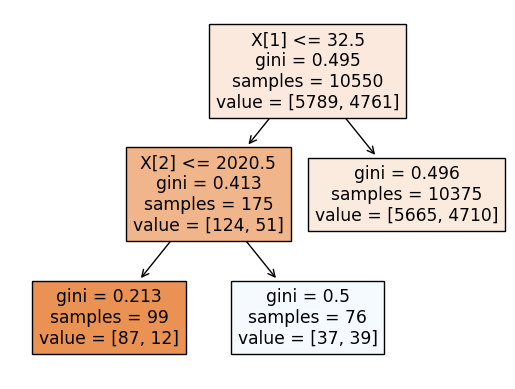

In [24]:
#plt.figure(figure=(10,10))
plot_tree(clf, filled=True)
plt.show()

In [25]:
test_pred = clf.predict(X_test)

In [26]:
clf.score(X_test, y_test)

0.5561698363555949

In [27]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, test_pred, average='weighted')

# Print the F1 score. It is a harmonic mean of precision and recall given by- F1 = 2*Precision*Recall/(Precision + Recall)
print(f"F1 score: {f1:.2f}")

F1 score: 0.40


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[2505,   17],
       [1990,   10]])


- look at predict probab, play with manual calculation with confusion matrix. get all row probabilities in predict proba, 
- try to get a better confusion matrix by improving models (generate synthetic data for positives and negatives)
-different models (cut-boost, gradient boost)
Can you elaborate further on F1, ROC-AUC score, log-loss

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
predictions = knn.predict_proba(X_test)
print(predictions)

[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 ...
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]]


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [32]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [33]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[2112  410]
 [1541  459]]


In [34]:
print(accuracy_score( 
     y_test, gbc.predict(X_test)))

0.5685537372843874


In [35]:
pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.84      0.68      2522
           1       0.53      0.23      0.32      2000

    accuracy                           0.57      4522
   macro avg       0.55      0.53      0.50      4522
weighted avg       0.56      0.57      0.52      4522



In [36]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 200}
Train Score: 0.550900206227181
Test Score: 0.5705440070765149


In [58]:
grid = {'max_depth':[2,3,4,5,6,7],
       'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10]}

gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200}
Train Score: 0.555450113176258
Test Score: 0.5612560813799203


In [59]:
gbcv_pred=gb_cv.predict(X_test)

print(classification_report(y_test, gbcv_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.69      2522
           1       0.51      0.14      0.22      2000

    accuracy                           0.56      4522
   macro avg       0.54      0.52      0.46      4522
weighted avg       0.54      0.56      0.48      4522



In [60]:
print(confusion_matrix(y_test, gb_cv.predict(X_test)))

[[2258  264]
 [1720  280]]


In [38]:
import catboost as ctb
from sklearn import metrics

In [39]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
print(model_CBC)

Learning rate set to 0.028175
0:	learn: 0.6926878	total: 68.3ms	remaining: 1m 8s
1:	learn: 0.6922232	total: 71.2ms	remaining: 35.5s
2:	learn: 0.6917587	total: 73.9ms	remaining: 24.6s
3:	learn: 0.6913175	total: 76.7ms	remaining: 19.1s
4:	learn: 0.6908921	total: 79.5ms	remaining: 15.8s
5:	learn: 0.6905565	total: 82.1ms	remaining: 13.6s
6:	learn: 0.6902531	total: 84.8ms	remaining: 12s
7:	learn: 0.6899168	total: 87.3ms	remaining: 10.8s
8:	learn: 0.6895286	total: 90.1ms	remaining: 9.92s
9:	learn: 0.6891829	total: 92.9ms	remaining: 9.19s
10:	learn: 0.6888960	total: 95.4ms	remaining: 8.58s
11:	learn: 0.6884853	total: 97.8ms	remaining: 8.05s
12:	learn: 0.6882318	total: 100ms	remaining: 7.6s
13:	learn: 0.6878230	total: 102ms	remaining: 7.17s
14:	learn: 0.6875001	total: 105ms	remaining: 6.9s
15:	learn: 0.6871899	total: 107ms	remaining: 6.59s
16:	learn: 0.6869397	total: 109ms	remaining: 6.33s
17:	learn: 0.6866503	total: 112ms	remaining: 6.08s
18:	learn: 0.6862988	total: 114ms	remaining: 5.87s
19:

243:	learn: 0.6614849	total: 591ms	remaining: 1.83s
244:	learn: 0.6614487	total: 593ms	remaining: 1.83s
245:	learn: 0.6613502	total: 594ms	remaining: 1.82s
246:	learn: 0.6612608	total: 596ms	remaining: 1.82s
247:	learn: 0.6612016	total: 598ms	remaining: 1.81s
248:	learn: 0.6611211	total: 600ms	remaining: 1.81s
249:	learn: 0.6610623	total: 602ms	remaining: 1.8s
250:	learn: 0.6609622	total: 603ms	remaining: 1.8s
251:	learn: 0.6609204	total: 605ms	remaining: 1.79s
252:	learn: 0.6608413	total: 607ms	remaining: 1.79s
253:	learn: 0.6607551	total: 609ms	remaining: 1.79s
254:	learn: 0.6607051	total: 612ms	remaining: 1.79s
255:	learn: 0.6606315	total: 614ms	remaining: 1.78s
256:	learn: 0.6605555	total: 616ms	remaining: 1.78s
257:	learn: 0.6604495	total: 618ms	remaining: 1.78s
258:	learn: 0.6603853	total: 620ms	remaining: 1.77s
259:	learn: 0.6602612	total: 622ms	remaining: 1.77s
260:	learn: 0.6601960	total: 623ms	remaining: 1.76s
261:	learn: 0.6601518	total: 625ms	remaining: 1.76s
262:	learn: 0.

432:	learn: 0.6458136	total: 991ms	remaining: 1.3s
433:	learn: 0.6457128	total: 993ms	remaining: 1.29s
434:	learn: 0.6456097	total: 994ms	remaining: 1.29s
435:	learn: 0.6455631	total: 996ms	remaining: 1.29s
436:	learn: 0.6454788	total: 998ms	remaining: 1.28s
437:	learn: 0.6453791	total: 1000ms	remaining: 1.28s
438:	learn: 0.6452505	total: 1s	remaining: 1.28s
439:	learn: 0.6451694	total: 1s	remaining: 1.28s
440:	learn: 0.6450417	total: 1s	remaining: 1.27s
441:	learn: 0.6449520	total: 1.01s	remaining: 1.27s
442:	learn: 0.6449004	total: 1.01s	remaining: 1.27s
443:	learn: 0.6448257	total: 1.01s	remaining: 1.27s
444:	learn: 0.6447255	total: 1.01s	remaining: 1.26s
445:	learn: 0.6446171	total: 1.02s	remaining: 1.26s
446:	learn: 0.6445419	total: 1.02s	remaining: 1.26s
447:	learn: 0.6444764	total: 1.02s	remaining: 1.26s
448:	learn: 0.6443468	total: 1.02s	remaining: 1.26s
449:	learn: 0.6442543	total: 1.03s	remaining: 1.25s
450:	learn: 0.6441475	total: 1.03s	remaining: 1.25s
451:	learn: 0.6440457

630:	learn: 0.6303274	total: 1.39s	remaining: 812ms
631:	learn: 0.6302792	total: 1.39s	remaining: 810ms
632:	learn: 0.6302043	total: 1.39s	remaining: 807ms
633:	learn: 0.6301507	total: 1.39s	remaining: 805ms
634:	learn: 0.6300340	total: 1.4s	remaining: 803ms
635:	learn: 0.6299684	total: 1.4s	remaining: 800ms
636:	learn: 0.6299124	total: 1.4s	remaining: 798ms
637:	learn: 0.6298296	total: 1.4s	remaining: 796ms
638:	learn: 0.6297557	total: 1.4s	remaining: 793ms
639:	learn: 0.6296914	total: 1.41s	remaining: 791ms
640:	learn: 0.6296270	total: 1.41s	remaining: 789ms
641:	learn: 0.6295373	total: 1.41s	remaining: 787ms
642:	learn: 0.6294905	total: 1.41s	remaining: 784ms
643:	learn: 0.6294441	total: 1.42s	remaining: 782ms
644:	learn: 0.6293154	total: 1.42s	remaining: 780ms
645:	learn: 0.6292697	total: 1.42s	remaining: 778ms
646:	learn: 0.6291465	total: 1.42s	remaining: 776ms
647:	learn: 0.6290988	total: 1.42s	remaining: 774ms
648:	learn: 0.6289932	total: 1.43s	remaining: 771ms
649:	learn: 0.628

821:	learn: 0.6172518	total: 1.79s	remaining: 387ms
822:	learn: 0.6172055	total: 1.79s	remaining: 385ms
823:	learn: 0.6171439	total: 1.79s	remaining: 383ms
824:	learn: 0.6170769	total: 1.79s	remaining: 380ms
825:	learn: 0.6170222	total: 1.79s	remaining: 378ms
826:	learn: 0.6169603	total: 1.8s	remaining: 376ms
827:	learn: 0.6168411	total: 1.8s	remaining: 374ms
828:	learn: 0.6167742	total: 1.8s	remaining: 371ms
829:	learn: 0.6167223	total: 1.8s	remaining: 369ms
830:	learn: 0.6166647	total: 1.8s	remaining: 367ms
831:	learn: 0.6166185	total: 1.81s	remaining: 365ms
832:	learn: 0.6165822	total: 1.81s	remaining: 363ms
833:	learn: 0.6165340	total: 1.81s	remaining: 360ms
834:	learn: 0.6164381	total: 1.81s	remaining: 358ms
835:	learn: 0.6163677	total: 1.81s	remaining: 356ms
836:	learn: 0.6163108	total: 1.82s	remaining: 354ms
837:	learn: 0.6162893	total: 1.82s	remaining: 351ms
838:	learn: 0.6162326	total: 1.82s	remaining: 349ms
839:	learn: 0.6161830	total: 1.82s	remaining: 347ms
840:	learn: 0.616

In [40]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [41]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.58      0.75      0.65      2522
           1       0.49      0.31      0.38      2000

    accuracy                           0.55      4522
   macro avg       0.54      0.53      0.52      4522
weighted avg       0.54      0.55      0.53      4522

[[1893  629]
 [1386  614]]


In [42]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)
print(model_CBR)

Learning rate set to 0.059409
0:	learn: 0.4974848	total: 3.88ms	remaining: 3.87s
1:	learn: 0.4973022	total: 5.87ms	remaining: 2.93s
2:	learn: 0.4971559	total: 7.73ms	remaining: 2.57s
3:	learn: 0.4969158	total: 9.53ms	remaining: 2.37s
4:	learn: 0.4966765	total: 11.6ms	remaining: 2.31s
5:	learn: 0.4964629	total: 13.9ms	remaining: 2.31s
6:	learn: 0.4963403	total: 16.1ms	remaining: 2.29s
7:	learn: 0.4961362	total: 18.2ms	remaining: 2.26s
8:	learn: 0.4960120	total: 20.4ms	remaining: 2.24s
9:	learn: 0.4958386	total: 22.2ms	remaining: 2.2s
10:	learn: 0.4956425	total: 24.1ms	remaining: 2.17s
11:	learn: 0.4955574	total: 26.8ms	remaining: 2.21s
12:	learn: 0.4954228	total: 28.6ms	remaining: 2.17s
13:	learn: 0.4952478	total: 30.5ms	remaining: 2.15s
14:	learn: 0.4950659	total: 32.2ms	remaining: 2.11s
15:	learn: 0.4949109	total: 33.8ms	remaining: 2.08s
16:	learn: 0.4947212	total: 35.2ms	remaining: 2.04s
17:	learn: 0.4945755	total: 37ms	remaining: 2.02s
18:	learn: 0.4944665	total: 38.5ms	remaining: 1

162:	learn: 0.4833163	total: 194ms	remaining: 997ms
163:	learn: 0.4832557	total: 195ms	remaining: 994ms
164:	learn: 0.4831965	total: 196ms	remaining: 992ms
165:	learn: 0.4831192	total: 197ms	remaining: 989ms
166:	learn: 0.4830109	total: 198ms	remaining: 986ms
167:	learn: 0.4829365	total: 199ms	remaining: 983ms
168:	learn: 0.4828309	total: 199ms	remaining: 981ms
169:	learn: 0.4827699	total: 200ms	remaining: 978ms
170:	learn: 0.4826546	total: 201ms	remaining: 975ms
171:	learn: 0.4826039	total: 202ms	remaining: 972ms
172:	learn: 0.4825292	total: 203ms	remaining: 969ms
173:	learn: 0.4824680	total: 204ms	remaining: 966ms
174:	learn: 0.4823912	total: 204ms	remaining: 964ms
175:	learn: 0.4823244	total: 205ms	remaining: 961ms
176:	learn: 0.4822478	total: 206ms	remaining: 958ms
177:	learn: 0.4821891	total: 207ms	remaining: 955ms
178:	learn: 0.4821073	total: 208ms	remaining: 953ms
179:	learn: 0.4820009	total: 209ms	remaining: 950ms
180:	learn: 0.4819555	total: 210ms	remaining: 948ms
181:	learn: 

349:	learn: 0.4706666	total: 391ms	remaining: 727ms
350:	learn: 0.4706078	total: 392ms	remaining: 726ms
351:	learn: 0.4705314	total: 393ms	remaining: 724ms
352:	learn: 0.4704395	total: 394ms	remaining: 723ms
353:	learn: 0.4703917	total: 395ms	remaining: 721ms
354:	learn: 0.4703303	total: 396ms	remaining: 720ms
355:	learn: 0.4702561	total: 397ms	remaining: 719ms
356:	learn: 0.4701917	total: 398ms	remaining: 717ms
357:	learn: 0.4701504	total: 399ms	remaining: 716ms
358:	learn: 0.4701071	total: 400ms	remaining: 714ms
359:	learn: 0.4700584	total: 401ms	remaining: 713ms
360:	learn: 0.4700190	total: 402ms	remaining: 711ms
361:	learn: 0.4699796	total: 403ms	remaining: 710ms
362:	learn: 0.4699068	total: 404ms	remaining: 708ms
363:	learn: 0.4698546	total: 404ms	remaining: 707ms
364:	learn: 0.4697805	total: 405ms	remaining: 705ms
365:	learn: 0.4697462	total: 406ms	remaining: 704ms
366:	learn: 0.4696924	total: 407ms	remaining: 702ms
367:	learn: 0.4696293	total: 408ms	remaining: 701ms
368:	learn: 

534:	learn: 0.4610832	total: 587ms	remaining: 510ms
535:	learn: 0.4610493	total: 588ms	remaining: 509ms
536:	learn: 0.4610211	total: 589ms	remaining: 508ms
537:	learn: 0.4609529	total: 590ms	remaining: 506ms
538:	learn: 0.4609003	total: 591ms	remaining: 505ms
539:	learn: 0.4608531	total: 592ms	remaining: 504ms
540:	learn: 0.4607976	total: 593ms	remaining: 503ms
541:	learn: 0.4607443	total: 593ms	remaining: 501ms
542:	learn: 0.4606789	total: 594ms	remaining: 500ms
543:	learn: 0.4606206	total: 595ms	remaining: 499ms
544:	learn: 0.4605704	total: 596ms	remaining: 498ms
545:	learn: 0.4605086	total: 597ms	remaining: 496ms
546:	learn: 0.4604890	total: 598ms	remaining: 495ms
547:	learn: 0.4604587	total: 599ms	remaining: 494ms
548:	learn: 0.4603902	total: 600ms	remaining: 493ms
549:	learn: 0.4603483	total: 601ms	remaining: 492ms
550:	learn: 0.4603241	total: 602ms	remaining: 490ms
551:	learn: 0.4602690	total: 603ms	remaining: 490ms
552:	learn: 0.4602065	total: 605ms	remaining: 489ms
553:	learn: 

713:	learn: 0.4530355	total: 784ms	remaining: 314ms
714:	learn: 0.4530104	total: 785ms	remaining: 313ms
715:	learn: 0.4529798	total: 786ms	remaining: 312ms
716:	learn: 0.4529511	total: 787ms	remaining: 311ms
717:	learn: 0.4529068	total: 788ms	remaining: 309ms
718:	learn: 0.4528937	total: 789ms	remaining: 308ms
719:	learn: 0.4528611	total: 790ms	remaining: 307ms
720:	learn: 0.4527870	total: 791ms	remaining: 306ms
721:	learn: 0.4527391	total: 791ms	remaining: 305ms
722:	learn: 0.4526617	total: 792ms	remaining: 304ms
723:	learn: 0.4526096	total: 793ms	remaining: 302ms
724:	learn: 0.4525769	total: 794ms	remaining: 301ms
725:	learn: 0.4525577	total: 795ms	remaining: 300ms
726:	learn: 0.4525144	total: 796ms	remaining: 299ms
727:	learn: 0.4524602	total: 797ms	remaining: 298ms
728:	learn: 0.4523871	total: 798ms	remaining: 297ms
729:	learn: 0.4523370	total: 799ms	remaining: 295ms
730:	learn: 0.4523186	total: 800ms	remaining: 294ms
731:	learn: 0.4523010	total: 800ms	remaining: 293ms
732:	learn: 

905:	learn: 0.4455654	total: 982ms	remaining: 102ms
906:	learn: 0.4454887	total: 983ms	remaining: 101ms
907:	learn: 0.4454532	total: 983ms	remaining: 99.6ms
908:	learn: 0.4454253	total: 984ms	remaining: 98.5ms
909:	learn: 0.4453895	total: 985ms	remaining: 97.4ms
910:	learn: 0.4453356	total: 986ms	remaining: 96.3ms
911:	learn: 0.4453079	total: 987ms	remaining: 95.2ms
912:	learn: 0.4452687	total: 988ms	remaining: 94.1ms
913:	learn: 0.4452139	total: 989ms	remaining: 93ms
914:	learn: 0.4451919	total: 990ms	remaining: 91.9ms
915:	learn: 0.4451592	total: 990ms	remaining: 90.8ms
916:	learn: 0.4451294	total: 991ms	remaining: 89.7ms
917:	learn: 0.4450912	total: 992ms	remaining: 88.6ms
918:	learn: 0.4450727	total: 993ms	remaining: 87.5ms
919:	learn: 0.4450414	total: 994ms	remaining: 86.4ms
920:	learn: 0.4449966	total: 995ms	remaining: 85.3ms
921:	learn: 0.4449651	total: 996ms	remaining: 84.2ms
922:	learn: 0.4449408	total: 997ms	remaining: 83.1ms
923:	learn: 0.4449104	total: 998ms	remaining: 82ms

In [43]:
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

Best Model: Gradient Boosting Classifier

In [48]:
import joblib
gb_cv.fit(X_train,y_train)
joblib.dump(gb_cv, 'model.joblib')

['model.joblib']

In [49]:
model = joblib.load('model.joblib')

# Use the model to make predictions on new data
y_pred = model.predict(X_test)

In [50]:
print(y_pred)

[0 1 0 ... 0 0 0]


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Generate some random classification data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Define the model to use in Grid Search
model = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Print feature importances
importances = best_estimator.feature_importances_
print(importances)

[0.08037681 0.03596076 0.32401105 0.02718419 0.03298484 0.03086851
 0.29299632 0.02382748 0.12433057 0.02745945]


In [56]:
feature_names = ['time', 'price', 'releaseyear', 'releasemonth', 'has_verb', 'has_noun', 'has_adj', 'has_date']

importances_with_names = sorted(list(zip(feature_names, importances)), key=lambda x: x[0])


for name, importance in importances_with_names:
    print(f"{name}: {importance}")

has_adj: 0.2929963165072184
has_date: 0.023827482641874273
has_noun: 0.030868513803763344
has_verb: 0.03298484480323373
price: 0.03596076032049768
releasemonth: 0.027184192695186238
releaseyear: 0.3240110506041487
time: 0.080376814358272
